In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import norm
def normal(x):
    min_value = x.min()
    max_value = x.max()

    return (x - min_value) / (max_value - min_value)

#mean = df['column_to_normalize'].mean()
#std = df['column_to_normalize'].std()
#df['normalized_column'] = (df['column_to_normalize'] - mean) / std

In [2]:
# address

import_file = 'sub05-rolling-test_ADOEFFORT_2025-09-25_18h43.05.486.csv'
sub = import_file[3:5]
path = '/Volumes/x9/INITIAL_DATABASE_MONEY/sub'+sub+'/'

if import_file[6:8] == "ro":
    strategy = 'rolling'
elif import_file[6:8] == "pr":
    strategy = 'proactive'
elif import_file[6:8] == "re":
    strategy = 'reactive'
elif import_file[6:8] == "st":
    strategy = 'static'

# Import an Excel file into a DataFrame
columns_to_import = ['n_block','n_back','m_correct','DifficultyLevel',
                     'false_alarm','hit','correct_rejection','miss',
                     'slider_effort.response','slider_arous.response','slider_valenc.response','slider_time.response','score']

df = pd.read_csv(path + import_file, usecols=columns_to_import)

df = df.dropna()

#computing dprim as perfomance

df.loc[df['false_alarm'] == 0, 'false_alarm'] = 0.01
df.loc[df['miss'] == 0, 'miss'] = 0.01
df.loc[df['miss'] == 0, 'miss'] = 0.01
df.loc[df['hit'] == 0, 'hit'] = 0.01

#df['dprime'] = norm.ppf(df['hit']/(df['hit']+df['miss']))- norm.ppf(df['false_alarm']/(df['false_alarm']+df['correct_rejection']))


#normlize the self-reports
df['effort'] = normal(df['slider_effort.response'])
df['arousal'] = normal(df['slider_arous.response'])
df['valence'] = normal(df['slider_valenc.response'])
df['time'] = normal(df['slider_time.response'])

# setting_up index
df.reset_index(drop=True, inplace=True)


# Categorize to 'low' and 'high'
median_effort = df['effort'].median()
df['effort_category'] = ['low effort' if x < median_effort else 'high effort' for x in df['effort']]

median_valence = df['valence'].median()
df['valence_category'] = ['low valence' if x < median_valence else 'high valence' for x in df['valence']]

median_arousal = df['arousal'].median()
df['arousal_category'] = ['low valence' if x < median_arousal else 'high arousal' for x in df['arousal']]

        
#adding RT
#computing response time of hit and false alaram
dfrt = pd.read_csv(path + import_file)
step_size = 62
means_list = []

# Iterate over the DataFrame in segments of 62 rows (excluding every 62nd row)
for start_idx in range(0, len(dfrt), step_size):
    end_idx = start_idx + step_size - 1  # Exclude the 62nd row, which is empty

    # Select the segment, excluding the last row (which is empty)
    df_segment = dfrt.iloc[start_idx:end_idx]

    # Calculate means where feedback is 12 and 13
    mean_response_12 = df_segment[df_segment['feedback'] == 12]['responseTime'].mean()
    mean_response_13 = df_segment[df_segment['feedback'] == 13]['responseTime'].mean()

    # Append the means to the list
    means_list.append({'mean_response_12': mean_response_12, 'mean_response_13': mean_response_13})

# Create a new DataFrame with the means
means_df = pd.DataFrame(means_list)

# Now means_df is the new DataFrame containing the means for each segment we put it back to df
df['rt_f'] = means_df['mean_response_12']
df['rt_h'] = means_df['mean_response_13']

#export
export_file = 'sub'+sub+'-'+strategy+'-'+'test'+'.csv'
df.to_csv(path + export_file, index=False)

df


,score,n_back,m_correct,DifficultyLevel,false_alarm,hit,correct_rejection,miss,n_block,slider_effort.response,...,slider_time.response,effort,arousal,valence,time,effort_category,valence_category,arousal_category,rt_f,rt_h
0,18.0,1.0,4.0,4.0,0.01,18.0,39.0,3.00,0.0,5.925926,...,49.259259,0.000000,0.210837,0.683983,0.313283,low effort,high valence,low valence,NaN,0.657854
1,3.0,2.0,4.0,7.0,5.00,8.0,35.0,12.00,1.0,71.203704,...,51.481481,0.693898,0.837438,0.725108,0.343358,low effort,high valence,low valence,0.752893,0.704735
2,5.0,2.0,4.0,7.0,5.00,10.0,35.0,10.00,2.0,85.370370,...,50.092593,0.844488,0.851232,0.699134,0.324561,low effort,high valence,high arousal,0.733380,0.624864
3,0.0,3.0,4.0,10.0,4.00,4.0,35.0,17.00,3.0,92.870370,...,50.370370,0.924213,0.955665,0.393939,0.328321,high effort,low valence,high arousal,0.712707,0.596876
4,1.0,3.0,4.0,10.0,4.00,5.0,35.0,16.00,4.0,88.611111,...,51.203704,0.878937,0.915271,0.313853,0.339599,high effort,low valence,high arousal,0.633629,0.636737
5,6.0,2.0,8.0,11.0,4.00,10.0,36.0,10.00,5.0,80.092593,...,49.722222,0.788386,0.886700,0.616883,0.319549,low effort,low valence,high arousal,0.721295,0.602843
6,3.0,2.0,8.0,11.0,6.00,9.0,34.0,11.00,6.0,84.259259,...,50.277778,0.832677,0.901478,0.627706,0.327068,low effort,low valence,high arousal,0.423108,0.640634
7,4.0,2.0,8.0,11.0,6.00,10.0,34.0,10.00,7.0,89.259259,...,50.925926,0.885827,0.891626,0.274892,0.335840,high effort,low valence,high arousal,0.469535,0.546846
8,19.0,1.0,8.0,8.0,0.01,19.0,40.0,1.00,8.0,71.388889,...,100.000000,0.695866,0.224631,0.517316,1.000000,low effort,low valence,low valence,NaN,0.522217
9,2.0,3.0,8.0,14.0,2.00,4.0,38.0,16.00,9.0,96.388889,...,50.462963,0.961614,0.606897,0.000000,0.329574,high effort,low valence,low valence,0.962988,0.800777


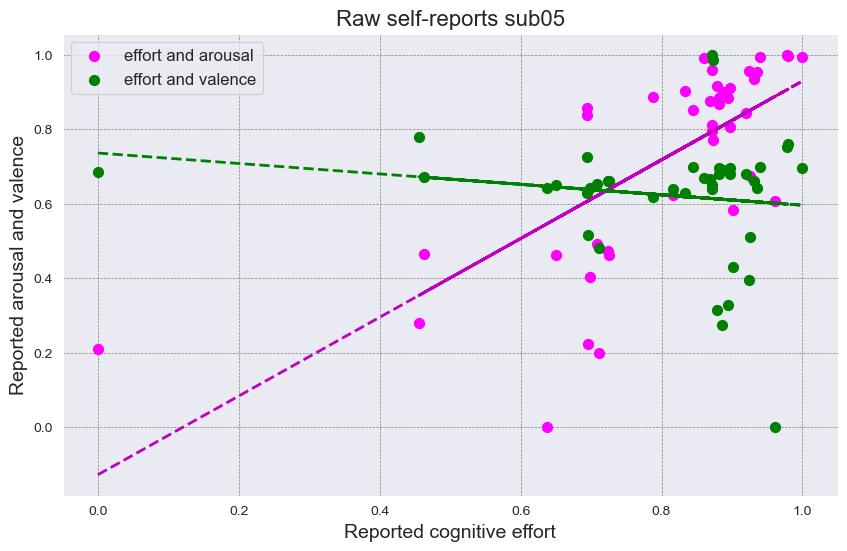

Regression Summary for effort and arousal : 
  Slope: 1.06
  Intercept: -0.13
  Correlation Coefficient (r): 0.71
  P-value: 0.00
  Standard error of the estimate: 0.16

Regression Summary for effort and valence : 
  Slope: -0.14
  Intercept: 0.74
  Correlation Coefficient (r): -0.15
  P-value: 0.36
  Standard error of the estimate: 0.15


In [3]:
# plotting phenomenology

import seaborn as sns

sns.set_style("darkgrid")


#which variables ?
x = df['effort']
x.name = df['effort'].head().name

y = df['arousal']
y.name = df['arousal'].head().name

z = df['valence']
z.name = df['valence'].head().name


# Scatter Plot with regression lines
plt.figure(figsize=(10, 6))

# Regression line for Column1 and Column2
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)
plt.scatter(x, y, label= x.name+" and "+y.name, color='magenta', s=50)
plt.plot(x, p1(x), "m--", linewidth=2)

# Regression line for Column1 and Column3
z2 = np.polyfit(x, z, 1)
p2 = np.poly1d(z2)
plt.scatter(x, z, label= x.name+" and "+z.name, color='green', s=50)
plt.plot(x, p2(x), "g--", linewidth=2)

# Labels, Title, and Legend
plt.xlabel('Reported cognitive effort', fontsize=14)
plt.ylabel('Reported arousal and valence', fontsize=14)
plt.title('Raw self-reports sub' + sub, fontsize=16)
plt.legend(fontsize=12)

# Grid and Style
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
#plt.style.use('seaborn-darkgrid')

# Show the plot
plt.show()

# Calculate and print the statistics for Column1 and Column2
result1 = linregress(x, y)
print("Regression Summary for " +x.name+" and "+y.name+" : ")
print(f"  Slope: {result1.slope:.2f}")
print(f"  Intercept: {result1.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result1.rvalue:.2f}")
print(f"  P-value: {result1.pvalue:.2f}")
print(f"  Standard error of the estimate: {result1.stderr:.2f}")

# Calculate and print the statistics for Column1 and Column3
result2 = linregress(x, z)
print("\nRegression Summary for " +x.name+" and "+z.name+" : ")
print(f"  Slope: {result2.slope:.2f}")
print(f"  Intercept: {result2.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result2.rvalue:.2f}")
print(f"  P-value: {result2.pvalue:.2f}")
print(f"  Standard error of the estimate: {result2.stderr:.2f}")

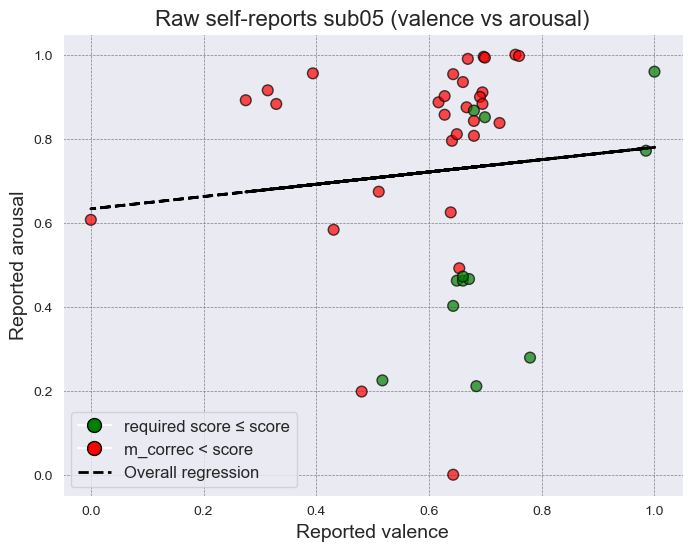


Regression Summary for arousal and valence : 
  Slope: 0.06
  Intercept: 0.58
  Correlation Coefficient (r): 0.09
  P-value: 0.55
  Standard error of the estimate: 0.10


In [4]:
# Scatter Plot: arousal vs valence
plt.figure(figsize=(8, 6))

# Condition: score bigger or smaller than m_correct
condition = df['score'] >= df['m_correct']
colors = condition.map({True: 'green', False: 'red'})  # red if bigger, blue if smaller

# Scatter with colors
plt.scatter(z, y, c=colors, s=60, alpha=0.7, edgecolor='k')

# Fit overall regression line
z3 = np.polyfit(z, y, 1)
p3 = np.poly1d(z3)
plt.plot(z, p3(z), "k--", linewidth=2, label="Overall regression")

# Labels, Title, Legend
plt.xlabel('Reported valence', fontsize=14)
plt.ylabel('Reported arousal', fontsize=14)
plt.title('Raw self-reports sub' + sub + " (valence vs arousal)", fontsize=16)

# Custom legend for score vs m_correct
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='required score ≤ score',
           markerfacecolor='green', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='m_correc < score ',
           markerfacecolor='red', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], color='k', lw=2, linestyle="--", label="Overall regression")
]
plt.legend(handles=legend_elements, fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

# Calculate regression stats (overall)
result3 = linregress(y, z)
print("\nRegression Summary for " +y.name+" and "+z.name+" : ")
print(f"  Slope: {result3.slope:.2f}")
print(f"  Intercept: {result3.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result3.rvalue:.2f}")
print(f"  P-value: {result3.pvalue:.2f}")
print(f"  Standard error of the estimate: {result3.stderr:.2f}")


In [5]:
import pandas as pd
import statsmodels.api as sm

# Create lag of score
df['score_lag1'] = df['score'].shift(1)

# Drop the first row to avoid NaN from lag
df_clean = df.dropna(subset=['score', 'score_lag1', 'n_block', 'effort', 'arousal', 'valence'])

# Define predictors
X = df_clean[['score', 'score_lag1', 'n_block']]
X = sm.add_constant(X)  # Add intercept

# Function to regress out predictors
def regress_out(y, X):
    model = sm.OLS(y, X).fit()
    return model.resid  # residuals = original y - predicted y

# Apply regression for each target variable
df_clean['effort_adj'] = regress_out(df_clean['effort'], X)
df_clean['arousal_adj'] = regress_out(df_clean['arousal'], X)
df_clean['valence_adj'] = regress_out(df_clean['valence'], X)


/var/folders/2c/svzl68596196fc899jtjl4t00000gn/T/ipykernel_1828/3419269306.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['effort_adj'] = regress_out(df_clean['effort'], X)
/var/folders/2c/svzl68596196fc899jtjl4t00000gn/T/ipykernel_1828/3419269306.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['arousal_adj'] = regress_out(df_clean['arousal'], X)
/var/folders/2c/svzl68596196fc899jtjl4t00000gn/T/ipykernel_1828/3419269306.py:22: SettingWithCopyWarning: 
A value is trying to be set

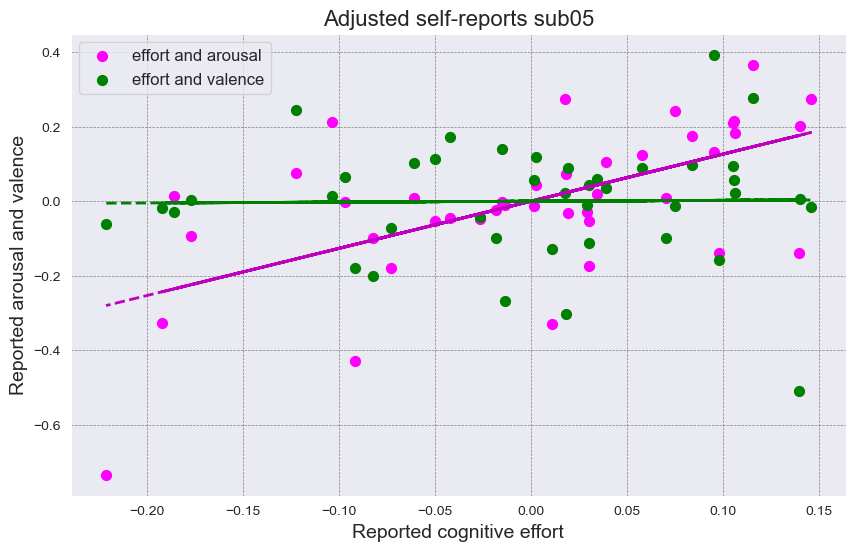

Regression Summary for effort and arousal : 
  Slope: 1.27
  Intercept: -0.00
  Correlation Coefficient (r): 0.59
  P-value: 0.00
  Standard error of the estimate: 0.28

Regression Summary for effort and valence : 
  Slope: 0.02
  Intercept: 0.00
  Correlation Coefficient (r): 0.01
  P-value: 0.93
  Standard error of the estimate: 0.26


In [6]:
# plotting phenomenology for adjusted self-reports


#which variables ?
x = df_clean['effort_adj']
x.name = df['effort'].head().name

y = df_clean['arousal_adj']
y.name = df['arousal'].head().name

z = df_clean['valence_adj']
z.name = df['valence'].head().name


# Scatter Plot with regression lines
plt.figure(figsize=(10, 6))

# Regression line for Column1 and Column2
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)
plt.scatter(x, y, label= x.name+" and "+y.name, color='magenta', s=50)
plt.plot(x, p1(x), "m--", linewidth=2)

# Regression line for Column1 and Column3
z2 = np.polyfit(x, z, 1)
p2 = np.poly1d(z2)
plt.scatter(x, z, label= x.name+" and "+z.name, color='green', s=50)
plt.plot(x, p2(x), "g--", linewidth=2)

# Labels, Title, and Legend
plt.xlabel('Reported cognitive effort', fontsize=14)
plt.ylabel('Reported arousal and valence', fontsize=14)
plt.title('Adjusted self-reports sub' + sub, fontsize=16)
plt.legend(fontsize=12)

# Grid and Style
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
#plt.style.use('seaborn-darkgrid')

# Show the plot
plt.show()

# Calculate and print the statistics for Column1 and Column2
result1 = linregress(x, y)
print("Regression Summary for " +x.name+" and "+y.name+" : ")
print(f"  Slope: {result1.slope:.2f}")
print(f"  Intercept: {result1.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result1.rvalue:.2f}")
print(f"  P-value: {result1.pvalue:.2f}")
print(f"  Standard error of the estimate: {result1.stderr:.2f}")

# Calculate and print the statistics for Column1 and Column3
result2 = linregress(x, z)
print("\nRegression Summary for " +x.name+" and "+z.name+" : ")
print(f"  Slope: {result2.slope:.2f}")
print(f"  Intercept: {result2.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result2.rvalue:.2f}")
print(f"  P-value: {result2.pvalue:.2f}")
print(f"  Standard error of the estimate: {result2.stderr:.2f}")

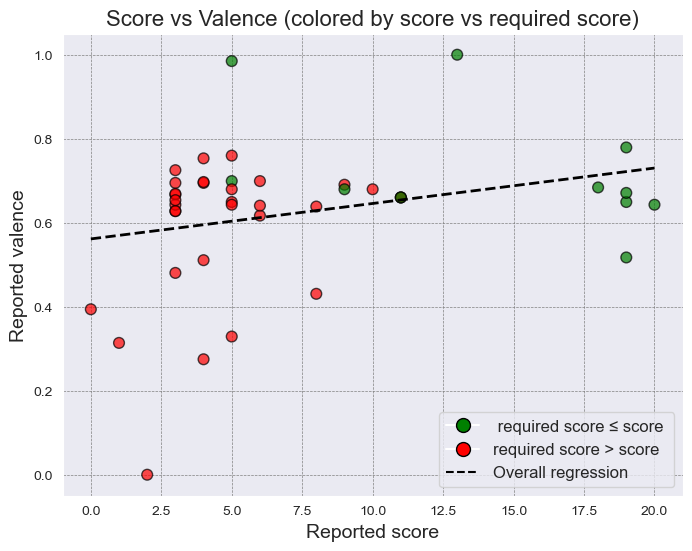

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Variables
s = df['score']
m = df['m_correct']
z = df['valence']  # assuming valence is this column

# Condition: score bigger or smaller than m_correct
condition = s >= m
colors = condition.map({True: 'green', False: 'red'})

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(s, z, c=colors, s=60, alpha=0.7, edgecolor='k')

# Regression line (overall, not conditional)
z4 = np.polyfit(s, z, 1)
p4 = np.poly1d(z4)
s_sorted = np.sort(s)
plt.plot(s_sorted, p4(s_sorted), "k--", linewidth=2, label="Overall regression")

# Labels, Title, Grid
plt.xlabel('Reported score', fontsize=14)
plt.ylabel('Reported valence', fontsize=14)
plt.title('Score vs Valence (colored by score vs required score)', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=' required score ≤ score ',
           markerfacecolor='green', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='required score > score',
           markerfacecolor='red', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], linestyle="--", color="k", label="Overall regression")
]
plt.legend(handles=legend_elements, fontsize=12)

plt.show()


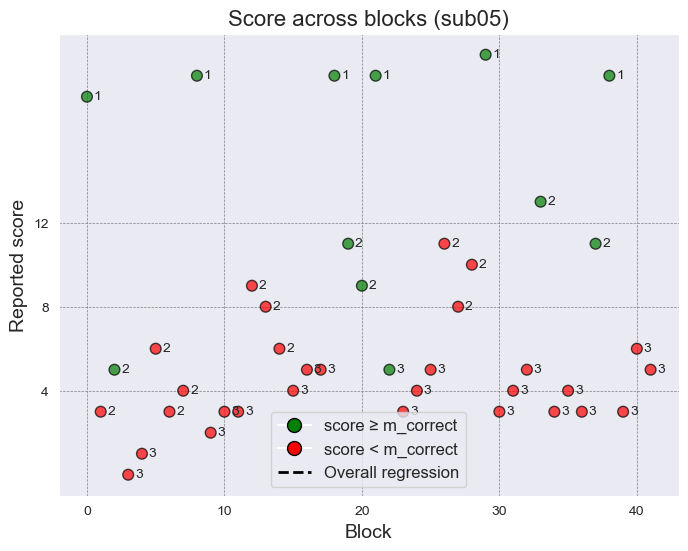

In [8]:
# Variables
b = df['n_block']
s = df['score']
m = df['m_correct']
n = df['n_back']  # assuming this column exists

# Color points based on score vs m_correct
colors = (s >= m).map({True: 'green', False: 'red'})

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(b, s, c=colors, s=60, alpha=0.7, edgecolor='k')

# Add n_back next to points
for i in range(len(df)):
    plt.text(b[i]+0.5, s[i], str(round(n[i])), fontsize=10, verticalalignment='center')


# Labels, Title
plt.xlabel('Block', fontsize=14)
plt.ylabel('Reported score', fontsize=14)
plt.title('Score across blocks (sub' + sub + ")", fontsize=16)

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='score ≥ m_correct',
           markerfacecolor='green', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='score < m_correct',
           markerfacecolor='red', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], color='k', lw=2, linestyle="--", label="Overall regression")
]
plt.legend(handles=legend_elements, fontsize=12)

# Y-axis ticks
plt.yticks([4, 8, 12])

plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()


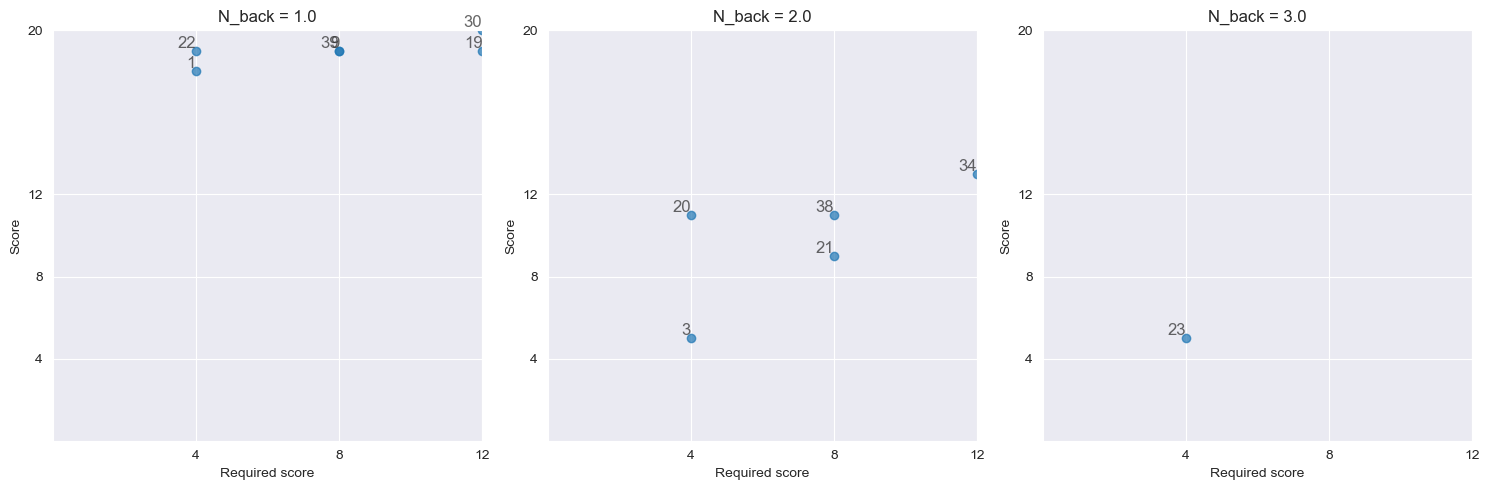

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique n_back values
n_back_values = df['n_back'].unique()
num_plots = len(n_back_values)



cols = num_plots 
rows = int(np.ceil(num_plots / cols))

# Set up subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()  # Flatten in case of multiple rows and columns

for ax, n_back in zip(axes, n_back_values):
    df_filtered = df[(df['score'] >= df['m_correct']) & (df['n_back'] == n_back)]
    
    ax.scatter(df_filtered['m_correct'], df_filtered['score'], alpha=0.7)
    
    for _, row in df_filtered.iterrows():
        ax.text(row['m_correct'], row['score'], str(round(row['n_block']+1)),
                fontsize=12, alpha=0.7, ha='right', va='bottom')
    
    ax.set_xlabel('Required score')
    ax.set_ylabel('Score')
    ax.set_title(f'N_back = {n_back}')
    ax.grid(True)
    
    # Fix x-axis and y-axis
    ax.set_xticks([4, 8, 12])
    ax.set_yticks([4, 8, 12, 20])
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 20)

# Remove any unused subplots
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


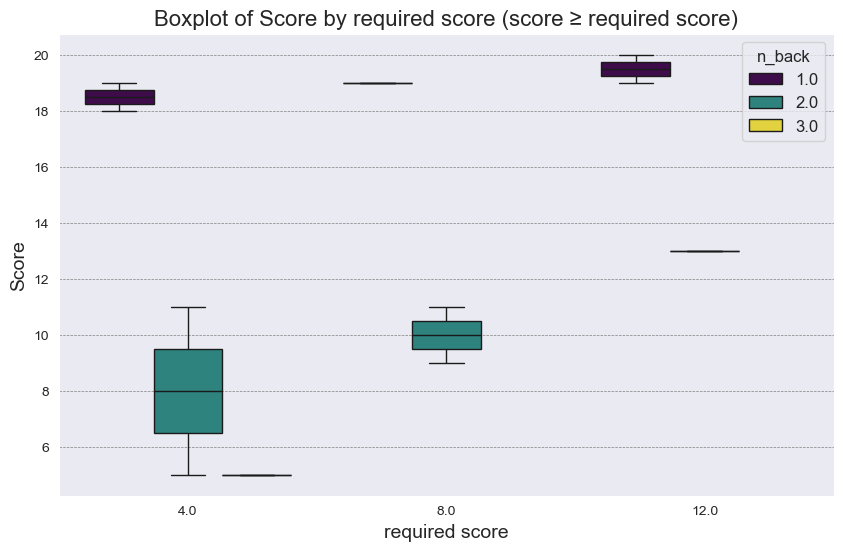

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataframe to only score >= m_correct
df_filtered = df[df['score'] >= df['m_correct']].copy()

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_filtered,
    x='m_correct',
    y='score',
    hue='n_back',   # color boxes by n_back
    palette='viridis'  # or another colormap
)

# Labels and Title
plt.xlabel('required score', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Boxplot of Score by required score (score ≥ required score)', fontsize=16)

# Legend
plt.legend(title='n_back', fontsize=12, title_fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5, color='gray', axis='y')
plt.show()


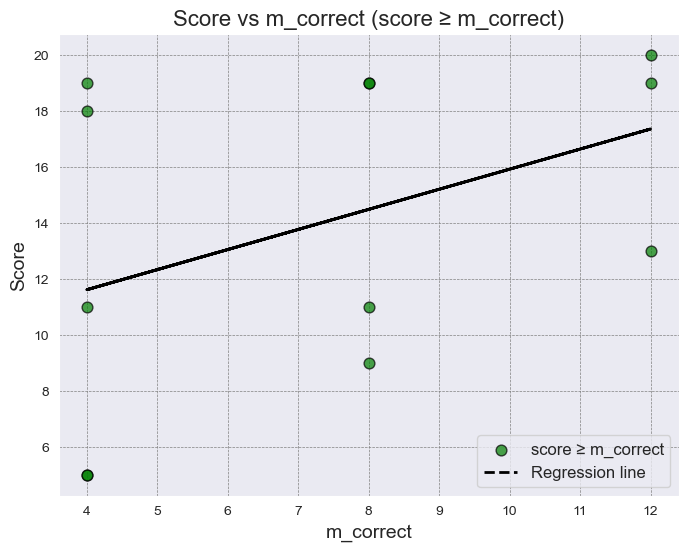

Regression Summary for score vs m_correct (score ≥ m_correct) :
  Slope: 0.72
  Intercept: 8.74
  Correlation Coefficient (r): 0.42
  P-value: 0.17
  Standard error of the estimate: 0.49


In [11]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Filtered dataframe: only score >= m_correct
df_filtered = df[df['score'] >= df['m_correct']].copy()

x = df_filtered['m_correct']
y = df_filtered['score']

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='green', s=60, alpha=0.7, edgecolor='k', label='score ≥ m_correct')

# Regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'k--', linewidth=2, label='Regression line')

# Labels and Title
plt.xlabel('m_correct', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Score vs m_correct (score ≥ m_correct)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

# Regression stats
result = linregress(x, y)
print("Regression Summary for score vs m_correct (score ≥ m_correct) :")
print(f"  Slope: {result.slope:.2f}")
print(f"  Intercept: {result.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result.rvalue:.2f}")
print(f"  P-value: {result.pvalue:.2f}")
print(f"  Standard error of the estimate: {result.stderr:.2f}")


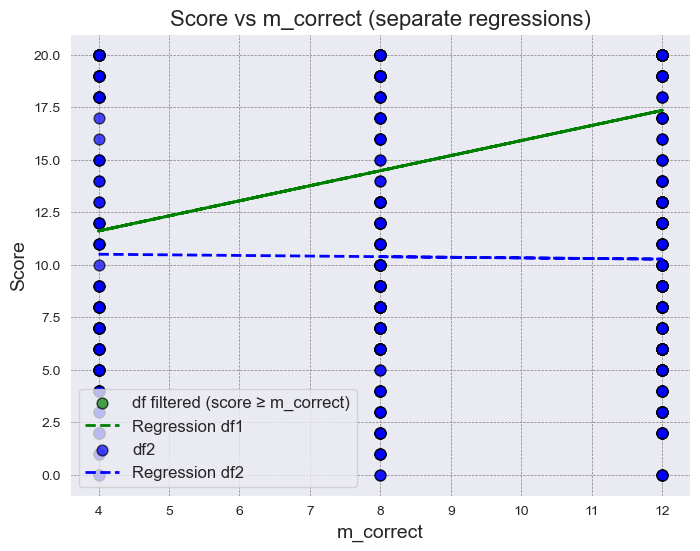

Regression Summary for df_filtered (score ≥ m_correct) :
  Slope: 0.72
  Intercept: 8.74
  Correlation Coefficient (r): 0.42
  P-value: 0.17
  Standard error of the estimate: 0.49

Regression Summary for df2 :
  Slope: -0.03
  Intercept: 10.62
  Correlation Coefficient (r): -0.02
  P-value: 0.75
  Standard error of the estimate: 0.09


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Filtered first dataframe: only score >= m_correct
df_filtered = df[df['score'] >= df['m_correct']].copy()

# Import the second dataframe
df2 = pd.read_csv("/Users/ali/Documents/Experiment/dfa-blocks.csv")
df2 = df2[df2['strategy'] == 'rolling'].copy()



# Scatter Plot
plt.figure(figsize=(8, 6))

# First dataframe points
plt.scatter(df_filtered['m_correct'], df_filtered['score'], c='green', s=60, alpha=0.7, edgecolor='k', label='df filtered (score ≥ m_correct)')

# Regression line for first dataframe
z1 = np.polyfit(df_filtered['m_correct'], df_filtered['score'], 1)
p1 = np.poly1d(z1)
plt.plot(df_filtered['m_correct'], p1(df_filtered['m_correct']), 'g--', linewidth=2, label='Regression df1')

# Second dataframe points
plt.scatter(df2['m_correct'], df2['score'], c='blue', s=60, alpha=0.7, edgecolor='k', label='df2')

# Regression line for second dataframe
z2 = np.polyfit(df2['m_correct'], df2['score'], 1)
p2 = np.poly1d(z2)
plt.plot(df2['m_correct'], p2(df2['m_correct']), 'b--', linewidth=2, label='Regression df2')

# Labels and Title
plt.xlabel('m_correct', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Score vs m_correct (separate regressions)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

# Regression stats for first dataframe
result1 = linregress(df_filtered['m_correct'], df_filtered['score'])
print("Regression Summary for df_filtered (score ≥ m_correct) :")
print(f"  Slope: {result1.slope:.2f}")
print(f"  Intercept: {result1.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result1.rvalue:.2f}")
print(f"  P-value: {result1.pvalue:.2f}")
print(f"  Standard error of the estimate: {result1.stderr:.2f}")

# Regression stats for second dataframe
result2 = linregress(df2['m_correct'], df2['score'])
print("\nRegression Summary for df2 :")
print(f"  Slope: {result2.slope:.2f}")
print(f"  Intercept: {result2.intercept:.2f}")
print(f"  Correlation Coefficient (r): {result2.rvalue:.2f}")
print(f"  P-value: {result2.pvalue:.2f}")
print(f"  Standard error of the estimate: {result2.stderr:.2f}")


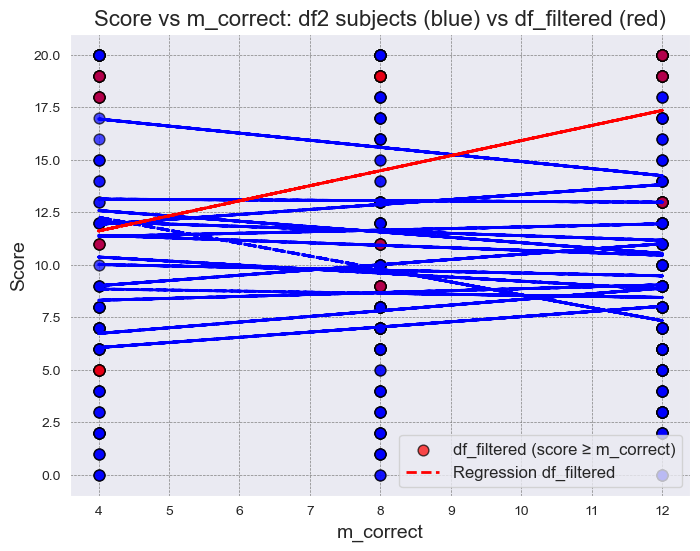

Regression df_filtered (red):
  Slope: 0.72, Intercept: 8.74, r: 0.42, p: 0.174

Regression df2 subjects (blue):
Subject sub06: Slope: -0.05, Intercept: 9.04, r: -0.03, p: 0.883
Subject sub08: Slope: -0.34, Intercept: 18.29, r: -0.26, p: 0.206
Subject sub12: Slope: 0.25, Intercept: 8.00, r: 0.14, p: 0.429
Subject sub15: Slope: 0.08, Intercept: 11.05, r: 0.04, p: 0.835
Subject sub18: Slope: -0.26, Intercept: 13.60, r: -0.15, p: 0.465
Subject sub20: Slope: 0.27, Intercept: 5.65, r: 0.14, p: 0.449
Subject sub21: Slope: 0.24, Intercept: 10.97, r: 0.20, p: 0.365
Subject sub22: Slope: 0.25, Intercept: 5.07, r: 0.16, p: 0.383
Subject sub24: Slope: -0.11, Intercept: 12.49, r: -0.07, p: 0.735
Subject sub25: Slope: 0.09, Intercept: 7.94, r: 0.04, p: 0.834
Subject sub31: Slope: -0.02, Intercept: 13.20, r: -0.01, p: 0.960
Subject sub32: Slope: -0.19, Intercept: 11.13, r: -0.11, p: 0.564
Subject sub33: Slope: -0.07, Intercept: 10.28, r: -0.04, p: 0.815
Subject sub35: Slope: -0.12, Intercept: 11.87,

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

plt.figure(figsize=(8, 6))

# 1️⃣ Plot df2 subjects in blue
subjects = df2['sub'].unique()
for sub_id in subjects:
    df_sub = df2[df2['sub'] == sub_id]
    
    # Scatter points
    plt.scatter(df_sub['m_correct'], df_sub['score'], color='blue', s=60, alpha=0.7, edgecolor='k')
    
    # Regression for this subject
    z = np.polyfit(df_sub['m_correct'], df_sub['score'], 1)
    p = np.poly1d(z)
    plt.plot(df_sub['m_correct'], p(df_sub['m_correct']), 'b--', linewidth=2)

# 2️⃣ Plot df_filtered (score ≥ m_correct) in red
plt.scatter(df_filtered['m_correct'], df_filtered['score'], color='red', s=60, alpha=0.7, edgecolor='k', label='df_filtered (score ≥ m_correct)')

# Regression for df_filtered
z_red = np.polyfit(df_filtered['m_correct'], df_filtered['score'], 1)
p_red = np.poly1d(z_red)
plt.plot(df_filtered['m_correct'], p_red(df_filtered['m_correct']), 'r--', linewidth=2, label='Regression df_filtered')

# Labels and Title
plt.xlabel('m_correct', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Score vs m_correct: df2 subjects (blue) vs df_filtered (red)', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.legend(fontsize=12)
plt.show()

# Optionally print regression slopes
print("Regression df_filtered (red):")
result_red = linregress(df_filtered['m_correct'], df_filtered['score'])
print(f"  Slope: {result_red.slope:.2f}, Intercept: {result_red.intercept:.2f}, r: {result_red.rvalue:.2f}, p: {result_red.pvalue:.3f}")

print("\nRegression df2 subjects (blue):")
for sub_id in subjects:
    df_sub = df2[df2['sub'] == sub_id]
    result = linregress(df_sub['m_correct'], df_sub['score'])
    print(f"Subject {sub_id}: Slope: {result.slope:.2f}, Intercept: {result.intercept:.2f}, r: {result.rvalue:.2f}, p: {result.pvalue:.3f}")


/var/folders/2c/svzl68596196fc899jtjl4t00000gn/T/ipykernel_1828/3250284487.py:30: RankWarning: Polyfit may be poorly conditioned
  z_red = np.polyfit(df_filtered_n['m_correct'], df_filtered_n['score'], 1)


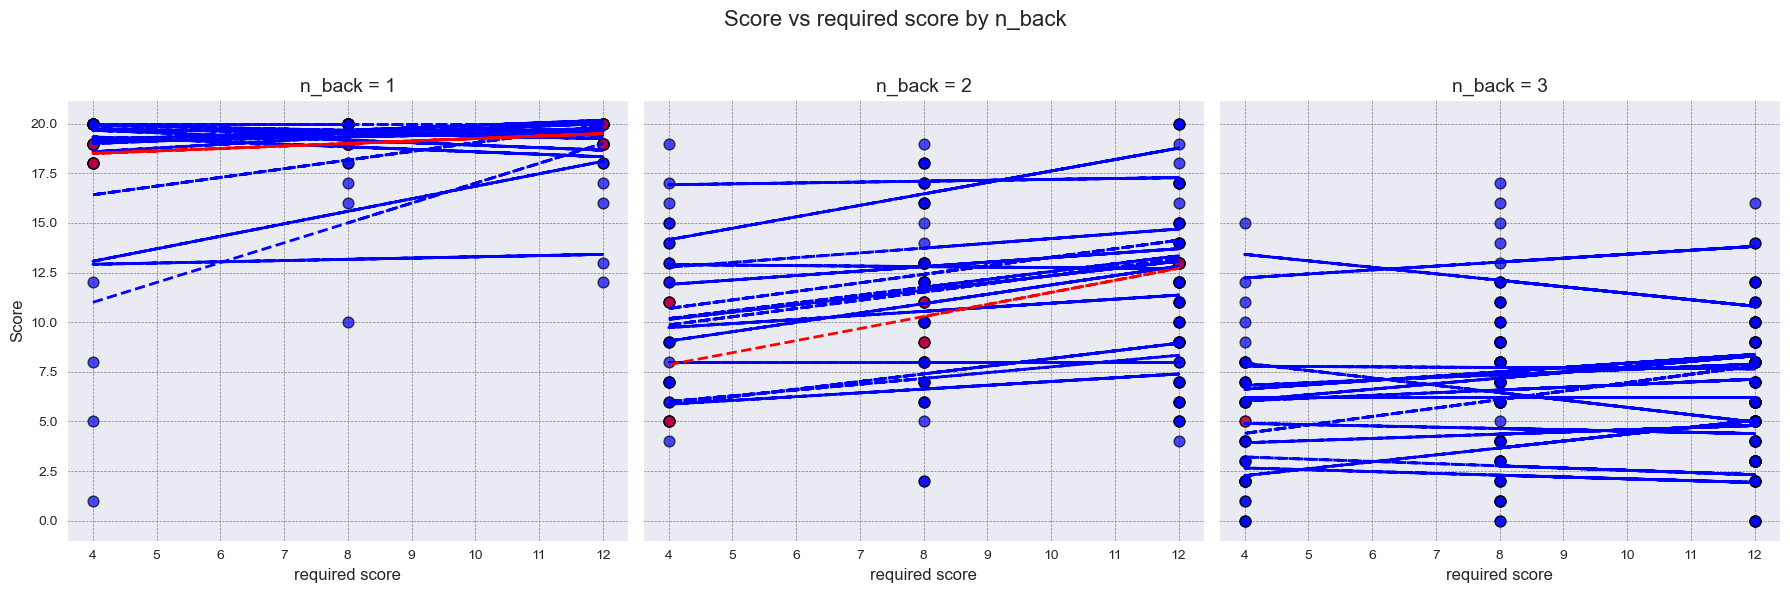

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Get unique n_back values
n_back_values = sorted(df2['n_back'].unique())

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, n_val in enumerate(n_back_values):
    ax = axes[i]
    
    # Filter df2 for this n_back
    df2_n = df2[df2['n_back'] == n_val]
    
    # Plot df2 subjects in blue
    subjects = df2_n['sub'].unique()
    for sub_id in subjects:
        df_sub = df2_n[df2_n['sub'] == sub_id]
        ax.scatter(df_sub['m_correct'], df_sub['score'], color='blue', s=60, alpha=0.7, edgecolor='k')
        # Regression for this subject
        z = np.polyfit(df_sub['m_correct'], df_sub['score'], 1)
        p = np.poly1d(z)
        ax.plot(df_sub['m_correct'], p(df_sub['m_correct']), 'b--', linewidth=2)
    
    # Plot df_filtered (score ≥ m_correct) in red (filter by same n_back if exists)
    df_filtered_n = df_filtered[df_filtered['n_back'] == n_val]
    if not df_filtered_n.empty:
        ax.scatter(df_filtered_n['m_correct'], df_filtered_n['score'], color='red', s=60, alpha=0.7, edgecolor='k')
        z_red = np.polyfit(df_filtered_n['m_correct'], df_filtered_n['score'], 1)
        p_red = np.poly1d(z_red)
        ax.plot(df_filtered_n['m_correct'], p_red(df_filtered_n['m_correct']), 'r--', linewidth=2)
    
    ax.set_title(f'n_back = {n_val}', fontsize=14)
    ax.set_xlabel('required score', fontsize=12)
    if i == 0:
        ax.set_ylabel('Score', fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.suptitle('Score vs required score by n_back', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [1]:
# creating a combined dataframe for MONEY (df2) vs NO MONEY (df1) group
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Import the non money dataframe
df1_comp = pd.read_csv("/Users/ali/Documents/Experiment/dfa-blocks.csv")
df1_comp = df1_comp[df1_comp['strategy'] == 'rolling'].copy()

# importing the money dataframe
# Initialize empty list
frames = []

# Loop through all subjects and read CSVs
for sub in ['01', '02', '03', '04','05']:
    df_temp = pd.read_csv(f"/Volumes/x9/INITIAL_DATABASE_MONEY/sub{sub}/sub{sub}-rolling-test.csv")
    df_temp["sub"] = sub  # optional: keep track of which subject it came from
    frames.append(df_temp)

# Concatenate into a single DataFrame
df2_comp = pd.concat(frames, ignore_index=True)

# creat a new variable in both dfs called fce
df1_comp['fce'] = (df1_comp['score'] - df1_comp['m_correct'])/(20 - df1_comp['m_correct'])
df2_comp['fce'] = (df2_comp['score'] - df2_comp['m_correct'])/(20 - df2_comp['m_correct'])


# removing all scores >= m_correct
df1_filt = df1_comp[df1_comp['score'] >= df1_comp['m_correct']].copy()
df2_filt = df2_comp[df2_comp['score'] >= df2_comp['m_correct']].copy()

# removing all scores < m_correct
df1_NegFilt = df1_comp[df1_comp['score'] < df1_comp['m_correct']].copy()
df2_NegFilt = df2_comp[df2_comp['score'] < df2_comp['m_correct']].copy()



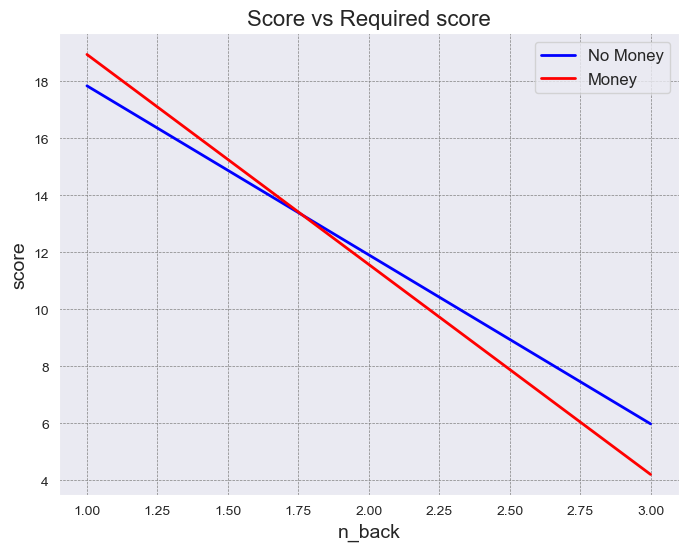

In [40]:

df1 = df1_comp
df2 = df2_comp

#x = 'm_correct'
x = 'n_back'
y = 'score'

# plotting score vs m_correct for both groups
plt.figure(figsize=(8, 6))

# Regression line for first dataframe
z1 = np.polyfit(df1[x], df1[y], 1)
p1 = np.poly1d(z1)
plt.plot(df1[x], p1(df1[x]), 'b', linewidth=2, label='No Money')

# Regression line for second dataframe
z2 = np.polyfit(df2[x], df2[y], 1)
p2 = np.poly1d(z2)
plt.plot(df2[x], p2(df2[x]), 'r', linewidth=2, label='Money')
# Labels and Title
plt.xlabel(x, fontsize=14)
plt.ylabel(y, fontsize=14)
plt.title('Score vs Required score', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

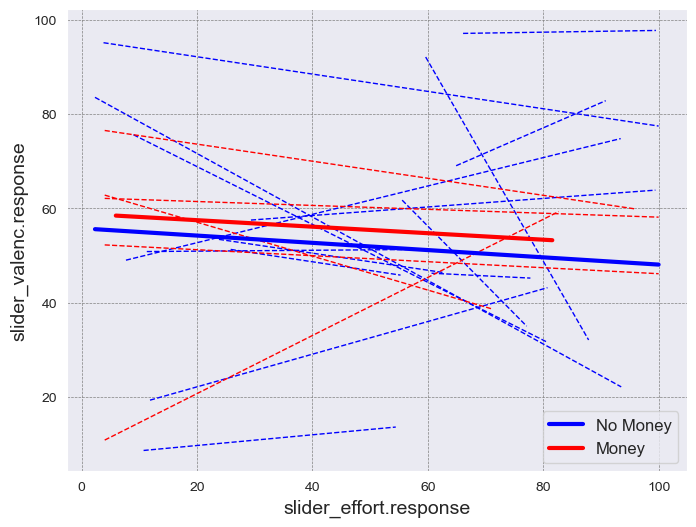


Regression per sub in df1 (blue):
Sub sub06: Slope=0.35, Intercept=15.16, r=0.33, p=0.091
Sub sub08: Slope=-0.19, Intercept=56.09, r=-0.34, p=0.094
Sub sub12: Slope=-2.13, Intercept=219.12, r=-0.94, p=0.000
Sub sub15: Slope=-0.61, Intercept=81.19, r=-0.84, p=0.000
Sub sub18: Slope=-0.06, Intercept=49.90, r=-0.04, p=0.830
Sub sub20: Slope=-1.24, Intercept=130.70, r=-0.64, p=0.000
Sub sub21: Slope=-0.18, Intercept=95.92, r=-0.41, p=0.057
Sub sub22: Slope=-0.18, Intercept=57.75, r=-0.24, p=0.202
Sub sub24: Slope=0.30, Intercept=46.70, r=0.51, p=0.005
Sub sub25: Slope=0.02, Intercept=95.97, r=0.20, p=0.275
Sub sub31: Slope=0.01, Intercept=50.74, r=0.08, p=0.687
Sub sub32: Slope=0.53, Intercept=34.48, r=0.58, p=0.001
Sub sub33: Slope=0.09, Intercept=54.88, r=0.09, p=0.623
Sub sub35: Slope=0.11, Intercept=7.36, r=0.14, p=0.458
Sub sub36: Slope=-0.67, Intercept=85.18, r=-0.92, p=0.000

Regression per sub in df2 (red):
Sub 01: Slope=-0.18, Intercept=77.30, r=-0.51, p=0.007
Sub 02: Slope=-0.36

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


#initialize
x= 'slider_effort.response'
y= 'slider_valenc.response'

df1 = df1_comp # df1_comp or df1_filt
df2 = df2_comp



plt.figure(figsize=(8, 6))

# --- 1️⃣ df1 subjects in BLUE ---
subs_df1 = df1["sub"].unique()
for sub_id in subs_df1:
    df_sub = df1[df1["sub"] == sub_id]

    # Scatter
    #plt.scatter(df_sub[x], df_sub[y], color="blue", s=60, alpha=0.5, edgecolor="k")

    # Regression
    if len(df_sub) > 1:
        z = np.polyfit(df_sub[x], df_sub[y], 1)
        p = np.poly1d(z)
        x_vals = np.linspace(df_sub[x].min(), df_sub[y].max(), 100)
        plt.plot(x_vals, p(x_vals), "b--", linewidth=1)

# --- 2️⃣ df2 subjects in RED ---
subs_df2 = df2["sub"].unique()
for sub_id in subs_df2:
    df_sub = df2[df2["sub"] == sub_id]

    # Scatter
    #plt.scatter(df_sub[x], df_sub[y], color="red", s=60, alpha=0.5, edgecolor="k")

    # Regression
    if len(df_sub) > 1:
        z = np.polyfit(df_sub[x], df_sub[y], 1)
        p = np.poly1d(z)
        x_vals = np.linspace(df_sub["m_correct"].min(), df_sub[x].max(), 100)
        plt.plot(x_vals, p(x_vals), "r--", linewidth=1)

# --- 3️⃣ General regression for df1 (thicker blue) ---
if len(df1) > 1:
    z1 = np.polyfit(df1[x], df1[y], 1)
    p1 = np.poly1d(z1)
    x1 = np.linspace(df1[x].min(), df1[x].max(), 100)
    plt.plot(x1, p1(x1), "b-", linewidth=3, label="No Money")

# --- 4️⃣ General regression for df2 (thicker red) ---
if len(df2) > 1:
    z2 = np.polyfit(df2[x], df2[y], 1)
    p2 = np.poly1d(z2)
    x2 = np.linspace(df2[x].min(), df2[y].max(), 100)
    plt.plot(x2, p2(x2), "r-", linewidth=3, label="Money")

# Labels and Title
plt.xlabel(x, fontsize=14)
plt.ylabel(y, fontsize=14)
#plt.title("Score vs Required score", fontsize=16)
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.legend(fontsize=12)
plt.show()

# --- Print regression stats ---
print("\nRegression per sub in df1 (blue):")
for sub_id in subs_df1:
    df_sub = df1[df1["sub"] == sub_id]
    if len(df_sub) > 1:
        result = linregress(df_sub[x], df_sub[y])
        print(f"Sub {sub_id}: Slope={result.slope:.2f}, Intercept={result.intercept:.2f}, r={result.rvalue:.2f}, p={result.pvalue:.3f}")

print("\nRegression per sub in df2 (red):")
for sub_id in subs_df2:
    df_sub = df2[df2["sub"] == sub_id]
    if len(df_sub) > 1:
        result = linregress(df_sub[x], df_sub[y])
        print(f"Sub {sub_id}: Slope={result.slope:.2f}, Intercept={result.intercept:.2f}, r={result.rvalue:.2f}, p={result.pvalue:.3f}")

# --- Group-level stats ---
if len(df1) > 1:
    res1 = linregress(df1[x], df1[y])
    print(f"\nNo Money: Slope={res1.slope:.2f}, Intercept={res1.intercept:.2f}, r={res1.rvalue:.2f}, p={res1.pvalue:.3f}")

if len(df2) > 1:
    res2 = linregress(df2[x], df2[y])
    print(f"Money: Slope={res2.slope:.2f}, Intercept={res2.intercept:.2f}, r={res2.rvalue:.2f}, p={res2.pvalue:.3f}")


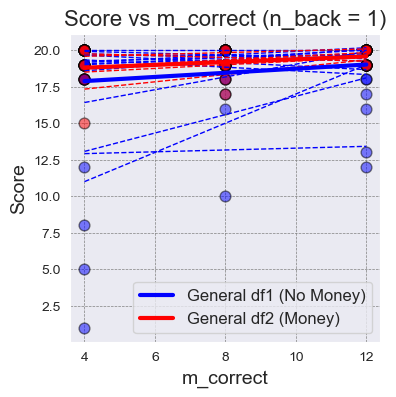

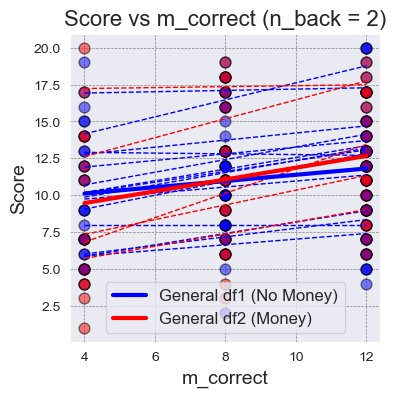

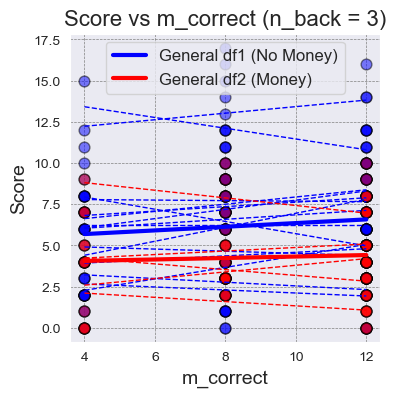

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Get all n_back values from both groups
n_back_values = sorted(set(df1["n_back"].unique()) | set(df2["n_back"].unique()))

for n_back in n_back_values:
    plt.figure(figsize=(4, 4))

    # --- filter by current n_back ---
    df1_nb = df1[df1["n_back"] == n_back]
    df2_nb = df2[df2["n_back"] == n_back]

    # --- 1️⃣ df1 subs in BLUE ---
    subs_df1 = df1_nb["sub"].unique()
    for sub_id in subs_df1:
        df_sub = df1_nb[df1_nb["sub"] == sub_id]
        plt.scatter(df_sub["m_correct"], df_sub["score"], color="blue", s=60, alpha=0.5, edgecolor="k")
        if len(df_sub) > 1:
            z = np.polyfit(df_sub["m_correct"], df_sub["score"], 1)
            p = np.poly1d(z)
            x_vals = np.linspace(df_sub["m_correct"].min(), df_sub["m_correct"].max(), 100)
            plt.plot(x_vals, p(x_vals), "b--", linewidth=1)

    # --- 2️⃣ df2 subs in RED ---
    subs_df2 = df2_nb["sub"].unique()
    for sub_id in subs_df2:
        df_sub = df2_nb[df2_nb["sub"] == sub_id]
        plt.scatter(df_sub["m_correct"], df_sub["score"], color="red", s=60, alpha=0.5, edgecolor="k")
        if len(df_sub) > 1:
            z = np.polyfit(df_sub["m_correct"], df_sub["score"], 1)
            p = np.poly1d(z)
            x_vals = np.linspace(df_sub["m_correct"].min(), df_sub["m_correct"].max(), 100)
            plt.plot(x_vals, p(x_vals), "r--", linewidth=1)

    # --- 3️⃣ General regression for df1 (blue solid) ---
    if len(df1_nb) > 1:
        z1 = np.polyfit(df1_nb["m_correct"], df1_nb["score"], 1)
        p1 = np.poly1d(z1)
        x1 = np.linspace(df1_nb["m_correct"].min(), df1_nb["m_correct"].max(), 100)
        plt.plot(x1, p1(x1), "b-", linewidth=3, label="General df1 (No Money)")

    # --- 4️⃣ General regression for df2 (red solid) ---
    if len(df2_nb) > 1:
        z2 = np.polyfit(df2_nb["m_correct"], df2_nb["score"], 1)
        p2 = np.poly1d(z2)
        x2 = np.linspace(df2_nb["m_correct"].min(), df2_nb["m_correct"].max(), 100)
        plt.plot(x2, p2(x2), "r-", linewidth=3, label="General df2 (Money)")

    # Labels & title
    plt.xlabel("m_correct", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.title(f"Score vs m_correct (n_back = {n_back})", fontsize=16)
    plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
    plt.legend(fontsize=12)
    plt.show()


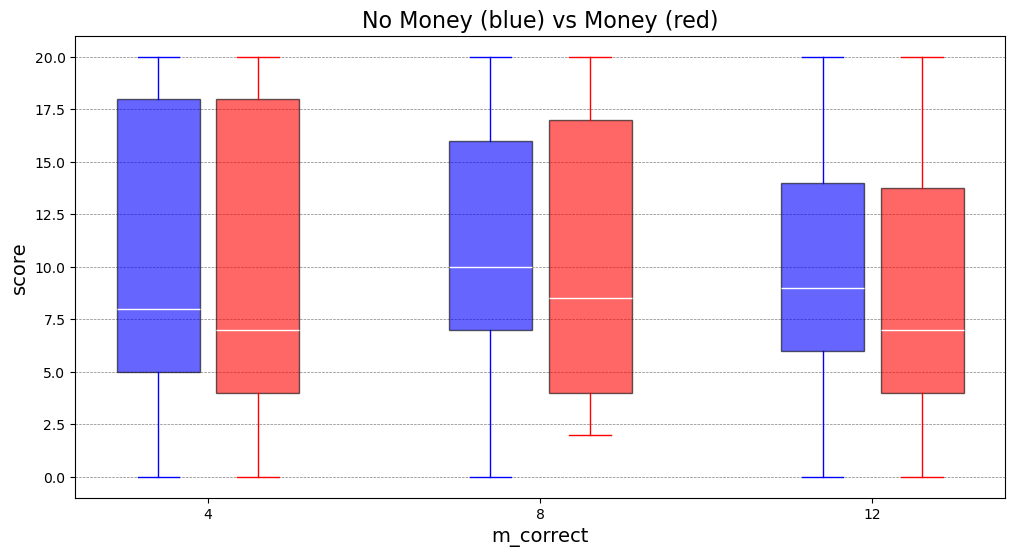

Wilcoxon (rank-sum) test df1 vs df2 by m_correct:
m_correct = 4: U=1726.00, p=0.6277
m_correct = 8: U=3803.50, p=0.2602
m_correct = 12: U=7120.00, p=0.0447


In [12]:
#initialize
x = 'm_correct'
#x = 'n_back'
y = 'score'

df1 = df1_comp  # df1_comp or df1_filt
df2 = df2_comp  # df2_comp or df2_filt

# Get unique m_correct values across both groups
m_correct_values = sorted(set(df1[x].unique()) | set(df2[x].unique()))
positions_df1 = np.arange(len(m_correct_values)) * 2.0    # spacing for df1
positions_df2 = positions_df1 + 0.6                         # shift for df2

plt.figure(figsize=(12, 6))

# --- df1 (blue) ---
data_df1 = [df1[df1[x] == mc][y] for mc in m_correct_values]
plt.boxplot(data_df1, positions=positions_df1, widths=0.5, patch_artist=True,
            boxprops=dict(facecolor="blue", alpha=0.6),
            medianprops=dict(color="white"),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"))

# --- df2 (red) ---
data_df2 = [df2[df2[x] == mc][y] for mc in m_correct_values]
plt.boxplot(data_df2, positions=positions_df2, widths=0.5, patch_artist=True,
            boxprops=dict(facecolor="red", alpha=0.6),
            medianprops=dict(color="white"),
            whiskerprops=dict(color="red"),
            capprops=dict(color="red"))

# X-axis labels in the middle of two boxes
plt.xticks(positions_df1 + 0.3, m_correct_values)
plt.xlabel(x, fontsize=14)
plt.ylabel(y, fontsize=14)
plt.title("No Money (blue) vs Money (red)", fontsize=16)
plt.grid(axis="y", linestyle="--", linewidth=0.5, color="gray")
plt.show()


import pandas as pd
from scipy.stats import mannwhitneyu



# Unique m_correct values
m_correct_values = sorted(set(df1[x].unique()) | set(df2[x].unique()))

print("Wilcoxon (rank-sum) test df1 vs df2 by " + x + ":")
for mc in m_correct_values:
    scores_df1 = df1[df1[x] == mc][y]
    scores_df2 = df2[df2[x] == mc][y]
    
    # Only run test if both groups have >0 values
    if len(scores_df1) > 0 and len(scores_df2) > 0:
        stat, p = mannwhitneyu(scores_df1, scores_df2, alternative="two-sided")
        print(f"m_correct = {mc}: U={stat:.2f}, p={p:.4f}")
    else:
        print(f"m_correct = {mc}: Not enough data to test")


NameError: name 'df' is not defined

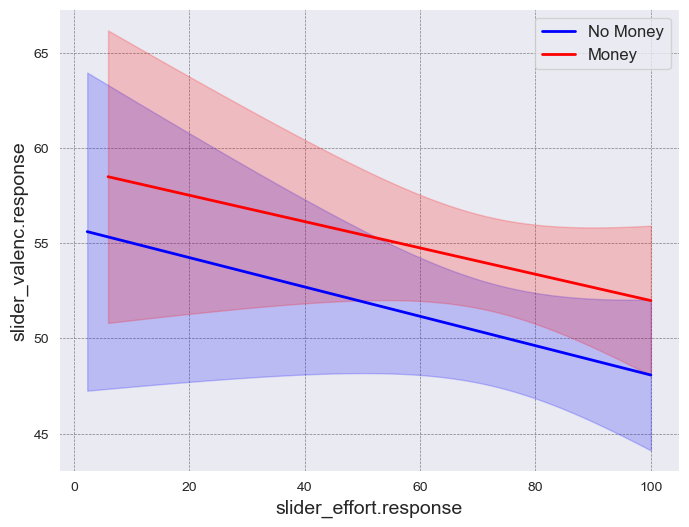

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# plotting score vs m_correct for both groups
plt.figure(figsize=(8, 6))

x = 'slider_effort.response'
y = 'slider_valenc.response'

x1 = df1_comp[x]
y1 = df1_comp[y]

x2 = df2_comp[x]
y2 = df2_comp[y]

def plot_with_ci(x, y, color, label):
    # Add constant for intercept
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    
    # Create prediction space
    x_pred = np.linspace(x.min(), x.max(), 100)
    X_pred = sm.add_constant(x_pred)
    
    # Get predictions and confidence intervals
    preds = model.get_prediction(X_pred)
    pred_summary = preds.summary_frame(alpha=0.05)  # 95% CI
    
    # Plot regression line
    plt.plot(x_pred, pred_summary['mean'], color=color, linewidth=2, label=label)
    
    # Plot confidence interval
    plt.fill_between(
        x_pred,
        pred_summary['mean_ci_lower'],
        pred_summary['mean_ci_upper'],
        color=color,
        alpha=0.2
    )

# Plot for both groups
plot_with_ci(x1, y1, 'b', 'No Money')
plot_with_ci(x2, y2, 'r', 'Money')

# Labels and Title
plt.xlabel(x, fontsize=14)
plt.ylabel(y, fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()
